#Regularization Techniques in Deep Learning

Regularization techniques help avoid overfitting and improve the generalization ability of neural networks.

#📌 1. Dropout

✅ What is Dropout?

>Dropout randomly deactivates neurons during training with a given probability.

>It forces the network to not rely on any one neuron, which makes it more robust.

📘 Equation:





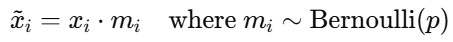

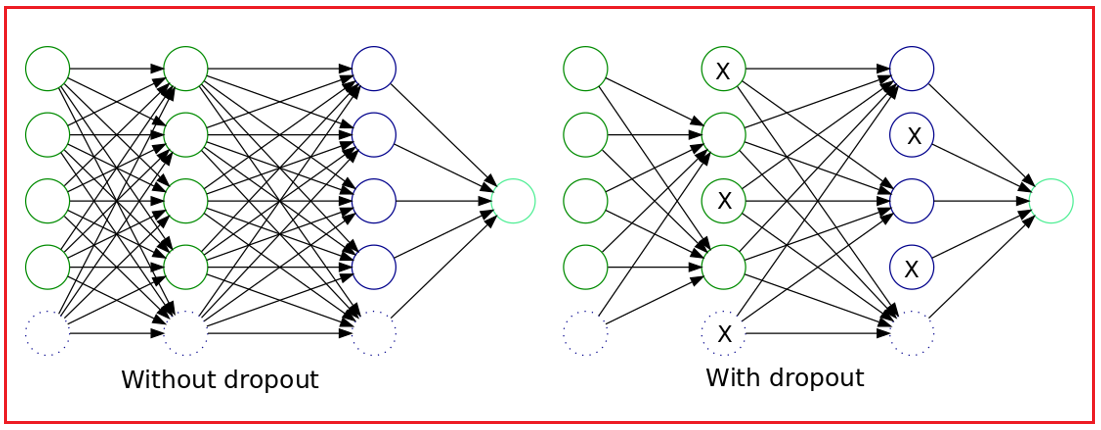

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a simple neural network with dropout layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    Dropout(0.5),  # Dropout layer drops 50% neurons randomly during training
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Drops 30% neurons
    Dense(10, activation='softmax')  # Output layer for 10-class classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#📌 2. Early Stopping

✅ What is Early Stopping?

Stops training early when the validation loss stops improving, avoiding unnecessary training and overfitting.

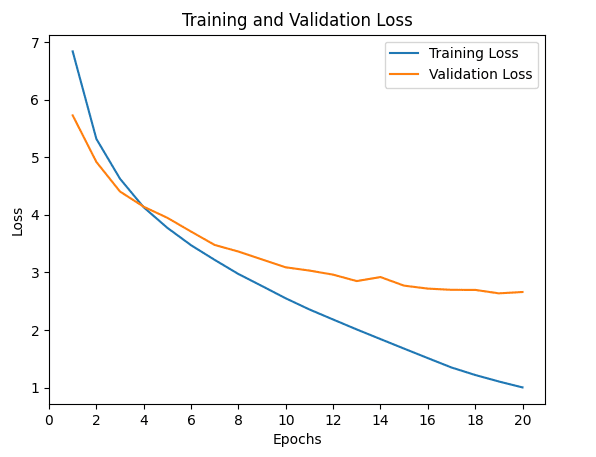

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Create some dummy data for demonstration
X_train = np.random.rand(1000, 784) # 1000 samples, 784 features (like flattened images)
y_train = np.random.randint(0, 10, 1000) # 1000 labels for 10 classes

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping monitors validation loss and stops training if no improvement after 3 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          callbacks=[early_stop])  # Stops early if no improvement


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1003 - loss: 2.4950 - val_accuracy: 0.1050 - val_loss: 2.3235
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1314 - loss: 2.3108 - val_accuracy: 0.0950 - val_loss: 2.3036
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1077 - loss: 2.3065 - val_accuracy: 0.1100 - val_loss: 2.3064
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1020 - loss: 2.3000 - val_accuracy: 0.0900 - val_loss: 2.3047
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1366 - loss: 2.2962 - val_accuracy: 0.1100 - val_loss: 2.3003
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1174 - loss: 2.2961 - val_accuracy: 0.1050 - val_loss: 2.3032
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1312 - loss: 2.2935 - val_accuracy: 0.0950 - val_loss: 2.3083
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1256 - loss: 2.2957 - val_accuracy: 0.1100 - 

#📌 3. Batch Normalization

✅ What is Batch Normalization?

>Normalizes the output of layers in each mini-batch so activations have zero mean and unit variance.

>Helps speed up training and reduces internal covariate shift.

📘 Equation:

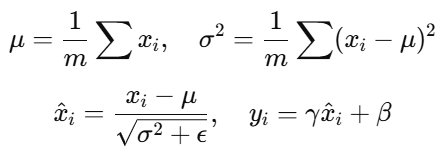

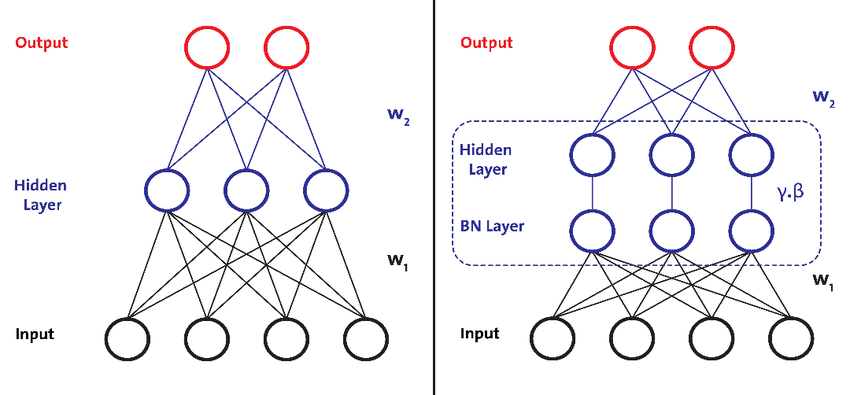

In [4]:
from tensorflow.keras.layers import BatchNormalization

# Add batch normalization layers after dense layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # Normalize activations
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])


#📌 🔄 Combine All Regularization Techniques
You can combine Dropout, Batch Norm, and Early Stopping in a real-world model:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),        # Normalize layer outputs
    Dropout(0.4),                # Drop 40% neurons
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed loss function
              metrics=['accuracy'])

# Apply early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Train model with validation split and early stopping
model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          callbacks=[early_stop])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0903 - loss: 3.2780 - val_accuracy: 0.0950 - val_loss: 2.6874
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1493 - loss: 2.7742 - val_accuracy: 0.0800 - val_loss: 2.6242
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2461 - loss: 2.2256 - val_accuracy: 0.0800 - val_loss: 2.5067
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2588 - loss: 2.1087 - val_accuracy: 0.0500 - val_loss: 2.5449
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2997 - loss: 1.8737 - val_accuracy: 0.0600 - val_loss: 2.5385
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3794 - loss: 1.7358 - val_accuracy: 0.0700 - val_loss: 2.5490


#📊 Summary Table

| Technique          | Goal                | How It Works                                        |
| ------------------ | ------------------- | --------------------------------------------------- |
| **Dropout**        | Prevent overfitting | Randomly ignores neurons during training            |
| **Early Stopping** | Avoid over-training | Stops training when validation performance declines |
| **Batch Norm**     | Stabilize training  | Normalizes intermediate layer outputs               |
